
🚀 Training: Batch Gradient Descent (Full Batch)
Epoch [50/200], Loss: 1.140225
Epoch [100/200], Loss: 0.370697
Epoch [150/200], Loss: 0.264985
Epoch [200/200], Loss: 0.250414

🚀 Training: Mini-Batch Gradient Descent (Batch Size = 32)
Epoch [50/200], Loss: 0.247425
Epoch [100/200], Loss: 0.248666
Epoch [150/200], Loss: 0.245133
Epoch [200/200], Loss: 0.247087

🚀 Training: Stochastic Gradient Descent (Batch Size = 1)
Epoch [50/200], Loss: 0.253785
Epoch [100/200], Loss: 0.253168
Epoch [150/200], Loss: 0.253887
Epoch [200/200], Loss: 0.254947

📊 FINAL COMPARISON
BGD             | Final Loss: 0.250414 | Time: 1.5884s
Mini-Batch      | Final Loss: 0.247087 | Time: 4.5015s
SGD             | Final Loss: 0.254947 | Time: 86.1050s

🔍 Learned Parameters (weight, bias):
BGD         : weight = 2.935, bias = 2.018
Mini-Batch  : weight = 2.981, bias = 2.032
SGD         : weight = 3.004, bias = 2.045


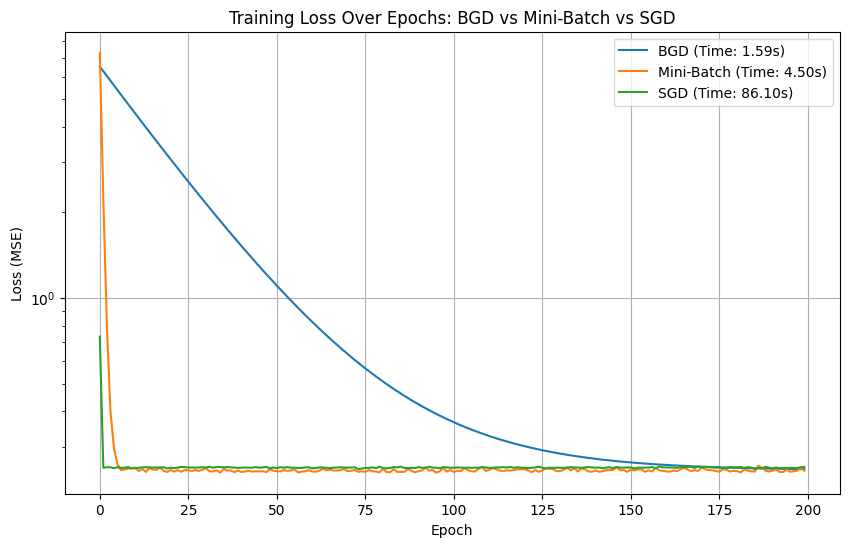

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import time

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# -------------------------------
# 1. Generate Synthetic Data
# -------------------------------
N = 1000  # Number of samples
X = np.random.randn(N, 1).astype(np.float32)
y = 3 * X.squeeze() + 2 + 0.5 * np.random.randn(N)  # y = 3x + 2 + noise
y = y.reshape(-1, 1).astype(np.float32)

X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y)

dataset = TensorDataset(X_tensor, y_tensor)

# -------------------------------
# 2. Define Model
# -------------------------------
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# -------------------------------
# 3. Training Function
# -------------------------------
def train_model(model, dataloader, optimizer, criterion, num_epochs=100):
    model.train()
    losses = []
    start_time = time.time()

    for epoch in range(num_epochs):
        epoch_loss = 0.0
        num_batches = 0

        for x_batch, y_batch in dataloader:
            optimizer.zero_grad()
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            num_batches += 1

        avg_loss = epoch_loss / num_batches
        losses.append(avg_loss)

        if (epoch + 1) % 50 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.6f}")

    total_time = time.time() - start_time
    return losses, total_time

# -------------------------------
# 4. Run All Three Variants
# -------------------------------

num_epochs = 200
learning_rate = 0.01

results = {}

# --------------------------------
# (A) Batch Gradient Descent (BGD)
# Batch size = full dataset
# --------------------------------
print("\n🚀 Training: Batch Gradient Descent (Full Batch)")
model_bgd = LinearModel()
optimizer_bgd = optim.SGD(model_bgd.parameters(), lr=learning_rate)
dataloader_bgd = DataLoader(dataset, batch_size=len(dataset), shuffle=False)  # Full batch
criterion = nn.MSELoss()

losses_bgd, time_bgd = train_model(model_bgd, dataloader_bgd, optimizer_bgd, criterion, num_epochs)
results['BGD'] = {'losses': losses_bgd, 'time': time_bgd, 'final_loss': losses_bgd[-1]}

# --------------------------------
# (B) Mini-Batch Gradient Descent
# Batch size = 32
# --------------------------------
print("\n🚀 Training: Mini-Batch Gradient Descent (Batch Size = 32)")
model_mini = LinearModel()
optimizer_mini = optim.SGD(model_mini.parameters(), lr=learning_rate)
dataloader_mini = DataLoader(dataset, batch_size=32, shuffle=True)  # Mini-batch
criterion = nn.MSELoss()

losses_mini, time_mini = train_model(model_mini, dataloader_mini, optimizer_mini, criterion, num_epochs)
results['Mini-Batch'] = {'losses': losses_mini, 'time': time_mini, 'final_loss': losses_mini[-1]}

# --------------------------------
# (C) Stochastic Gradient Descent (SGD)
# Batch size = 1
# --------------------------------
print("\n🚀 Training: Stochastic Gradient Descent (Batch Size = 1)")
model_sgd = LinearModel()
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=learning_rate)
dataloader_sgd = DataLoader(dataset, batch_size=1, shuffle=True)  # One sample at a time
criterion = nn.MSELoss()

losses_sgd, time_sgd = train_model(model_sgd, dataloader_sgd, optimizer_sgd, criterion, num_epochs)
results['SGD'] = {'losses': losses_sgd, 'time': time_sgd, 'final_loss': losses_sgd[-1]}

# -------------------------------
# 5. Compare Results
# -------------------------------
print("\n" + "="*50)
print("📊 FINAL COMPARISON")
print("="*50)
for method, res in results.items():
    print(f"{method:15} | Final Loss: {res['final_loss']:.6f} | Time: {res['time']:.4f}s")

# Extract learned parameters
print("\n🔍 Learned Parameters (weight, bias):")
for name, model in zip(['BGD', 'Mini-Batch', 'SGD'], [model_bgd, model_mini, model_sgd]):
    w = model.linear.weight.item()
    b = model.linear.bias.item()
    print(f"{name:12}: weight = {w:.3f}, bias = {b:.3f}")

# -------------------------------
# 6. Plot Training Loss Curves
# -------------------------------
plt.figure(figsize=(10, 6))
for method, res in results.items():
    plt.plot(res['losses'], label=f"{method} (Time: {res['time']:.2f}s)")

plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Over Epochs: BGD vs Mini-Batch vs SGD")
plt.legend()
plt.yscale('log')  # Log scale to see convergence clearly
plt.grid(True)
plt.show()